In [2]:
import pandas as pd
import numpy as np

In [3]:
from numpy.random import randn
np.random.seed(101)

Основными типами данных в Pandas являются Series и DataFrame.

Series – это проиндексированный одномерный массив значений. Он похож на простой словарь типа dict, где имя элемента будет соответствовать индексу, а значение – значению записи.

DataFrame — это проиндексированный многомерный массив значений, соответственно каждый столбец DataFrame, является структурой Series.

# Series

In [8]:
labels = ['a', 'b', 'c']
my_list = [10, 20, 30]
arr = np.array([10, 20, 30])
d = {'a': 10, 'b': 20, 'c': 30}

In [9]:
pd.Series(data=my_list)

0    10
1    20
2    30
dtype: int64

In [10]:
pd.Series(data=my_list, index=labels)

a    10
b    20
c    30
dtype: int64

In [11]:
pd.Series(arr,labels)

a    10
b    20
c    30
dtype: int64

In [12]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

In [14]:
pd.Series([sum,print,len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

## Использование индексов

In [15]:
ser1 = pd.Series([1, 2, 3, 4], index=['USA', 'Germany', 'USSR', 'Japan'])
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [16]:
ser2 = pd.Series([1, 2, 5, 4], index=['USA', 'Germany', 'Italy', 'Japan'])
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

In [17]:
ser1['USA']

1

In [18]:
ser1 + ser2

Germany    4.0
Italy      NaN
Japan      8.0
USA        2.0
USSR       NaN
dtype: float64

In [36]:
ser1[:2]

USA        1
Germany    2
dtype: int64

# DataFrames

## Создание DF

In [4]:
pd.DataFrame?

In [5]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [6]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


## Чтение и запись DF

Pandas может считывать и записывать данные в различных форматах: http://pandas.pydata.org/pandas-docs/version/0.20/io.html

Лично я предпочитаю хранить данные в бинарном формате Msgpack, если имеется достаточно ОЗУ.

Если размер данных значительно превышает объём ОЗУ, необходимо использоавть БД. Pandas поддерживает нативную работу со многими реляционными БД.

DF можно конвертировать в другие форматы, например MongoDB, при помощи [`odo`](http://odo.pydata.org/en/latest/) (часть интерфейса blaze).

Можно не только загружать данные из локальных файлов, но и из Интернета — достаточно вместо адреса на локальном компьютере указать прямю ссылку на файл.

Также существует дополнительный пакет, который называется `pandas_datareader`. Он загружает данные из следующих источников:

    - Yahoo! Finance<remote_data.yahoo>
    - Google Finance<remote_data.google>
    - Enigma<remote_data.enigma>
    - Quandl<remote_data.quandl>
    - St.Louis FED (FRED)<remote_data.fred>
    - Kenneth French's data library<remote_data.ff>
    - World Bank<remote_data.wb>
    - OECD<remote_data.oecd>
    - Eurostat<remote_data.eurostat>
    - Thrift Savings Plan<remote_data.tsp>
    - Nasdaq Trader symbol definitions<remote_data.nasdaq_symbols>
    
Ну и наконец существует социальная сеть data.world, где можно обмениваться данными и загружать их в pandas.

In [86]:
pd.read_html(
    'http://www.fdic.gov/bank/individual/failed/banklist.html',
    parse_dates=["Closing Date", "Updated Date"])[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-07-26
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18
5,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,2017-01-13,2017-05-18
6,Allied Bank,Mulberry,AR,91,Today's Bank,2016-09-23,2016-11-17
7,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,2016-08-19,2017-06-01
8,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,2016-05-06,2016-09-06
9,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,2016-04-29,2016-09-06


In [8]:
titanic_full_df = pd.read_csv(
    "https://github.com/agconti/kaggle-titanic/raw/master/data/train.csv", sep=",")

## Быстрый взгляд на данные

* PassengerId — идентификатор пассажира
* Survival — поле в котором указано спасся человек (1) или нет (0)
* Pclass — содержит социально-экономический статус:
* * высокий
* * средний
* * низкий
* Name — имя пассажира
* Sex — пол пассажира
* Age — возраст
* SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)
* Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)
* Ticket — номер билета
* Fare — цена билета
* Cabin — каюта
* Embarked — порт посадки
* * C — Cherbourg
* * Q — Queenstown
* * S — Southampton

In [24]:
titanic_full_df.shape

(891, 12)

In [21]:
titanic_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [22]:
titanic_full_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
titanic_full_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [93]:
titanic_full_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Relatives        int64
dtype: object

In [27]:
titanic_full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
titanic_full_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
titanic_full_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
titanic_full_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C


In [12]:
titanic_df = titanic_full_df.sample(10)

## Индексация и выделение

In [14]:
titanic_df["Age"]

842    30.0
179    36.0
323    22.0
281    28.0
389    17.0
32      NaN
132    47.0
313    28.0
98     34.0
710    24.0
Name: Age, dtype: float64

In [62]:
type(titanic_df["Age"])

pandas.core.series.Series

In [63]:
# Pass a list of column names
titanic_df[["Age", "Sex"]]

,Age,Sex
564,NaN,female
247,24.0,female
467,56.0,male
550,17.0,male
250,NaN,male
512,36.0,male
442,25.0,male
207,26.0,male
122,32.5,male
679,36.0,male


In [64]:
titanic_df["Relatives"] = titanic_df["SibSp"] + titanic_df["Parch"]

In [65]:
titanic_df[["SibSp", "Parch", "Relatives"]]

,SibSp,Parch,Relatives
564,0,0,0
247,0,2,2
467,0,0,0
550,0,2,2
250,0,0,0
512,0,0,0
442,1,0,1
207,0,0,0
122,1,0,1
679,0,1,1


In [15]:
titanic_df.drop("Relatives", axis=1)  # inplace=True

ValueError: labels ['Relatives'] not contained in axis

In [68]:
titanic_df.drop(564)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S,2
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S,0
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,2
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S,0
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,0
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S,1
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,0
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1


In [16]:
titanic_df.index.tolist()

[842, 179, 323, 281, 389, 32, 132, 313, 98, 710]

Выберем ряд по индексу

In [18]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C


In [20]:
titanic_full_df.loc[442 : 450, ["Age", "Sex"]]

,Age,Sex
442,25.0,male
443,28.0,female
444,NaN,male
445,4.0,male
446,13.0,female
447,34.0,male
448,5.0,female
449,52.0,male
450,36.0,male


In [74]:
titanic_df.set_index(["Embarked"]).loc["S"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Relatives
Embarked,,,,,,,,,,,,
S,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,0
S,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,2
S,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,0
S,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,0
S,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,0
S,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,1


In [75]:
titanic_df.iloc[0]

PassengerId                               565
Survived                                    0
Pclass                                      3
Name           Meanwell, Miss. (Marion Ogden)
Sex                                    female
Age                                       NaN
SibSp                                       0
Parch                                       0
Ticket                      SOTON/O.Q. 392087
Fare                                     8.05
Cabin                                     NaN
Embarked                                    S
Relatives                                   0
Name: 564, dtype: object

In [77]:
titanic_df.loc[[564, 442]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.050,NaN,S,0
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.775,NaN,S,1


In [78]:
titanic_df.loc[[564, 442], ["Name", "Sex"]]

,Name,Sex
564,"Meanwell, Miss. (Marion Ogden)",female
442,"Petterson, Mr. Johan Emil",male


In [79]:
titanic_df == 1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
564,False,False,False,False,False,False,False,False,False,False,False,False,False
247,False,True,False,False,False,False,False,False,False,False,False,False,False
467,False,False,True,False,False,False,False,False,False,False,False,False,False
550,False,True,True,False,False,False,False,False,False,False,False,False,False
250,False,False,False,False,False,False,False,False,False,False,False,False,False
512,False,True,True,False,False,False,False,False,False,False,False,False,False
442,False,False,False,False,False,False,True,False,False,False,False,False,True
207,False,True,False,False,False,False,False,False,False,False,False,False,False
122,False,False,False,False,False,False,True,False,False,False,False,False,True
679,False,True,True,False,False,False,False,True,False,False,False,False,True


In [80]:
titanic_df.Survived == 1

564    False
247     True
467    False
550     True
250    False
512     True
442    False
207     True
122    False
679     True
Name: Survived, dtype: bool

In [21]:
titanic_df[titanic_df["Survived"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S


In [23]:
titanic_full_df[titanic_full_df["Survived"] == 1]["Sex"].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [101]:
titanic_full_df[(titanic_full_df["Fare"] > 100)
                | (titanic_full_df["Name"].str.find("Master") != -1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.00,B96 B98,S


# Методы

In [90]:
titanic_df["Embarked"].unique()

array(['S', 'C'], dtype=object)

In [91]:
titanic_df["Embarked"].nunique()

2

In [92]:
titanic_df["Survived"].value_counts()

1    5
0    5
Name: Survived, dtype: int64

In [103]:
titanic_full_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [107]:
titanic_full_df["Pclass"].replace({1: "Элита", 2: "Средний класс", 3: "Работяги"}, inplace=True)

In [110]:
titanic_full_df["Pclass"].value_counts()

Работяги         491
Элита            216
Средний класс    184
Name: Pclass, dtype: int64

In [114]:
titanic_full_df["Fare"].apply(lambda x: "Дёшево" if x < 20 else "Дорого")

0      Дёшево
1      Дорого
2      Дёшево
3      Дорого
4      Дёшево
5      Дёшево
6      Дорого
7      Дорого
8      Дёшево
9      Дорого
10     Дёшево
11     Дорого
12     Дёшево
13     Дорого
14     Дёшево
15     Дёшево
16     Дорого
17     Дёшево
18     Дёшево
19     Дёшево
20     Дорого
21     Дёшево
22     Дёшево
23     Дорого
24     Дорого
25     Дорого
26     Дёшево
27     Дорого
28     Дёшево
29     Дёшево
        ...  
861    Дёшево
862    Дорого
863    Дорого
864    Дёшево
865    Дёшево
866    Дёшево
867    Дорого
868    Дёшево
869    Дёшево
870    Дёшево
871    Дорого
872    Дёшево
873    Дёшево
874    Дорого
875    Дёшево
876    Дёшево
877    Дёшево
878    Дёшево
879    Дорого
880    Дорого
881    Дёшево
882    Дёшево
883    Дёшево
884    Дёшево
885    Дорого
886    Дёшево
887    Дорого
888    Дорого
889    Дорого
890    Дёшево
Name: Fare, Length: 891, dtype: object

In [115]:
titanic_full_df["Fare_Bin"] = titanic_full_df["Fare"].apply(lambda x: "Дёшево" if x < 20 else "Дорого")

In [117]:
titanic_df.sort_values(by="Fare", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,2
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C,1
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S,0
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,0
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,0
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S,2
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S,0
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S,1
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S,0


# Работа с пропущенными значениями

In [25]:
titanic_full_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [118]:
titanic_df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,2
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1


In [26]:
titanic_df.dropna(subset=["Age", "Sex"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,NaN,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C


In [132]:
titanic_df.dropna(thresh=12)  # не менее 12 заполненных колонок

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S,2
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S,0
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,2
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,0
442,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,347076,7.7750,NaN,S,1
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,0
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1


In [128]:
titanic_df.fillna("ПРОПУСК")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,ПРОПУСК,0,0,SOTON/O.Q. 392087,8.0500,ПРОПУСК,S,0
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24,0,2,250649,14.5000,ПРОПУСК,S,2
467,468,0,1,"Smart, Mr. John Montgomery",male,56,0,0,113792,26.5500,ПРОПУСК,S,0
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17,0,2,17421,110.8833,C70,C,2
250,251,0,3,"Reed, Mr. James George",male,ПРОПУСК,0,0,362316,7.2500,ПРОПУСК,S,0
512,513,1,1,"McGough, Mr. James Robert",male,36,0,0,PC 17473,26.2875,E25,S,0
442,443,0,3,"Petterson, Mr. Johan Emil",male,25,1,0,347076,7.7750,ПРОПУСК,S,1
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26,0,0,2699,18.7875,ПРОПУСК,C,0
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,ПРОПУСК,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C,1


In [27]:
titanic_df["Age"].mean()

29.555555555555557

In [134]:
titanic_df["Age"].fillna(value=titanic_df["Age"].mean())

564    31.5625
247    24.0000
467    56.0000
550    17.0000
250    31.5625
512    36.0000
442    25.0000
207    26.0000
122    32.5000
679    36.0000
Name: Age, dtype: float64

In [145]:
titanic_full_df[["Sex", "Survived"]].pivot_table(index=["Sex"], columns=["Survived"], aggfunc=len)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [148]:
titanic_full_df[["Sex", "Survived", "Age"]].pivot_table(
    values=["Age"], index=["Sex"], columns=["Survived"], aggfunc="mean")

Age           
Survived          0          1
Sex                           
female    25.046875  28.847716
male      31.618056  27.276022

In [151]:
titanic_full_df.groupby("Pclass")

In [28]:
titanic_full_df.groupby("Pclass").max()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Pclass,,,,,,,,,
1,890,1,"Young, Miss. Marie Grice",male,80.0,3,4,WE/P 5735,512.3292
2,887,1,"del Carlo, Mr. Sebastiano",male,70.0,3,3,W/C 14208,73.5000
3,891,1,"van Melkebeke, Mr. Philemon",male,74.0,8,6,W./C. 6609,69.5500


In [158]:
titanic_full_df.groupby("Pclass").mean()["Age"]

Pclass
Работяги         25.140620
Средний класс    29.877630
Элита            38.233441
Name: Age, dtype: float64

In [157]:
titanic_full_df.groupby("Pclass").mean().loc["Работяги"]

PassengerId    439.154786
Survived         0.242363
Age             25.140620
SibSp            0.615071
Parch            0.393075
Fare            13.675550
Name: Работяги, dtype: float64

Другие функции: count, min/max, describe(), first, std ...

In [160]:
titanic_full_df.groupby("Pclass").describe()["Age"]

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
Работяги,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0
Средний класс,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Элита,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0


In [161]:
titanic_full_df.groupby("Pclass").describe()["Age"].transpose()

Pclass,Работяги,Средний класс,Элита
count,355.000000,173.000000,186.000000
mean,25.140620,29.877630,38.233441
std,12.495398,14.001077,14.802856
min,0.420000,0.670000,0.920000
25%,18.000000,23.000000,27.000000
50%,24.000000,29.000000,37.000000
75%,32.000000,36.000000,49.000000
max,74.000000,70.000000,80.000000


In [163]:
titanic_full_df.groupby("Pclass")["Age"].agg(["min", "max", "std"])

,min,max
Pclass,,
Работяги,0.42,74.0
Средний класс,0.67,70.0
Элита,0.92,80.0


In [165]:
titanic_full_df.groupby("Pclass").agg({"Age": np.mean, "PassengerId": "count"})

,Age,PassengerId
Pclass,,
Работяги,25.140620,491
Средний класс,29.877630,184
Элита,38.233441,216


In [168]:
titanic_full_df.groupby(["Pclass", "Sex"]).mean()["Fare"]

Pclass         Sex   
Работяги       female     16.118810
               male       12.661633
Средний класс  female     21.970121
               male       19.741782
Элита          female    106.125798
               male       67.226127
Name: Fare, dtype: float64

# Цикл по значениям

Если вы исползуете циклы, возможно вы что-то делаете не так. Иногда, однако, это необходимо.

In [189]:
ser1

USA        1
Germany    2
USSR       3
Japan      4
dtype: int64

In [193]:
for (index, value) in ser1.iteritems():
    print("Страна {}, место {}.".format(index, value))

Страна USA, место 1.
Страна Germany, место 2.
Страна USSR, место 3.
Страна Japan, место 4.


In [197]:
for index, row in titanic_df.iterrows():
    print(index, row["Name"])

564 Meanwell, Miss. (Marion Ogden)
247 Hamalainen, Mrs. William (Anna)
467 Smart, Mr. John Montgomery
550 Thayer, Mr. John Borland Jr
250 Reed, Mr. James George
512 McGough, Mr. James Robert
442 Petterson, Mr. Johan Emil
207 Albimona, Mr. Nassef Cassem
122 Nasser, Mr. Nicholas
679 Cardeza, Mr. Thomas Drake Martinez


In [201]:
for group_name, group in titanic_full_df.groupby("Pclass"):
    print(group_name, group["Age"].mean())

Работяги 25.1406197183
Средний класс 29.8776300578
Элита 38.2334408602


# Слияние и соединение

https://pandas.pydata.org/pandas-docs/stable/merging.html

In [169]:
df1 = pd.DataFrame(
    {
        'A': ['A0', 'A1', 'A2', 'A3'],
        'B': ['B0', 'B1', 'B2', 'B3'],
        'C': ['C0', 'C1', 'C2', 'C3'],
        'D': ['D0', 'D1', 'D2', 'D3']
    },
    index=[0, 1, 2, 3])

df2 = pd.DataFrame(
    {
        'A': ['A4', 'A5', 'A6', 'A7'],
        'B': ['B4', 'B5', 'B6', 'B7'],
        'C': ['C4', 'C5', 'C6', 'C7'],
        'D': ['D4', 'D5', 'D6', 'D7']
    },
    index=[4, 5, 6, 7])

df3 = pd.DataFrame(
    {
        'A': ['A8', 'A9', 'A10', 'A11'],
        'B': ['B8', 'B9', 'B10', 'B11'],
        'C': ['C8', 'C9', 'C10', 'C11'],
        'D': ['D8', 'D9', 'D10', 'D11']
    },
    index=[8, 9, 10, 11])

In [170]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [171]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [172]:
left = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
})

right = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
})

In [173]:
pd.merge(left, right, how='inner', on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


# Графики

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline
sns.set_style("ticks")
rcParams['figure.figsize'] = 12, 6

In [174]:
ser2

USA        1
Germany    2
Italy      5
Japan      4
dtype: int64

In [29]:
ser2.plot();

NameError: name 'ser2' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110031ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11036e5f8>]], dtype=object)

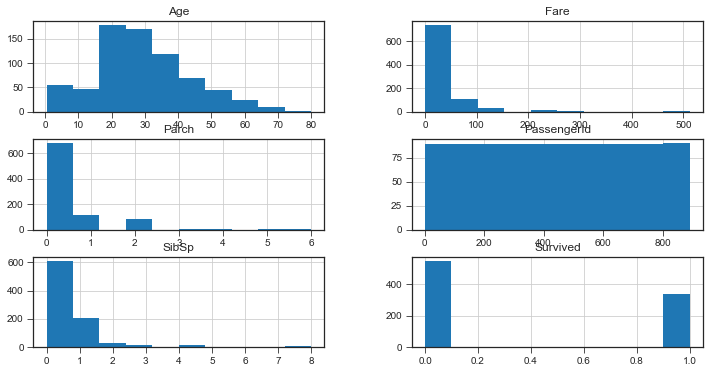

In [185]:
titanic_full_df.hist()

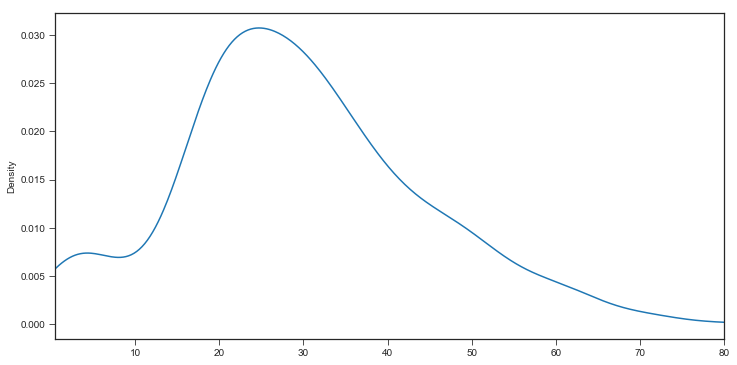

In [187]:
titanic_full_df["Age"].plot("kde", xlim=(titanic_full_df["Age"].min(), titanic_full_df["Age"].max()))

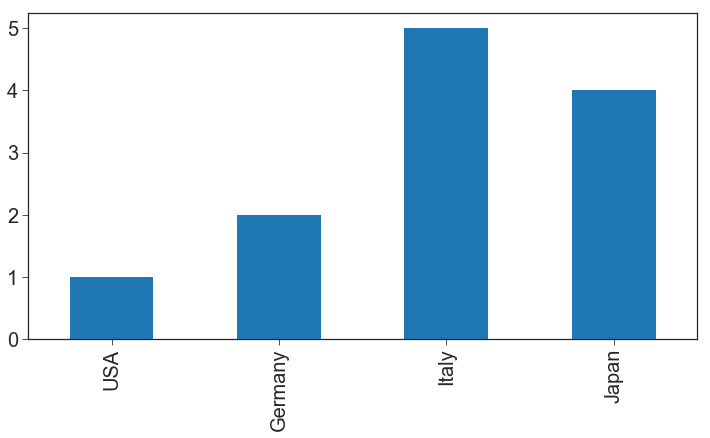

In [179]:
ser2.plot(kind="bar", fontsize=20)

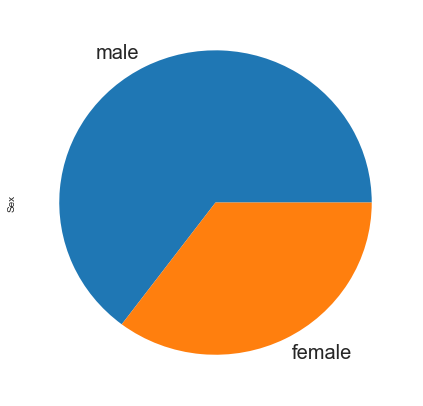

In [181]:
titanic_full_df["Sex"].value_counts().plot(kind="pie", figsize=(7, 7), fontsize=20);

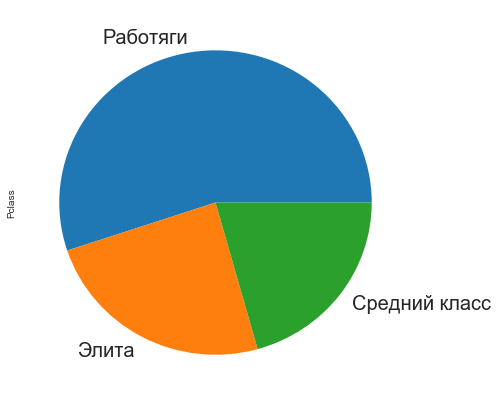

In [182]:
titanic_full_df["Pclass"].value_counts().plot(kind="pie", figsize=(7, 7), fontsize=20);

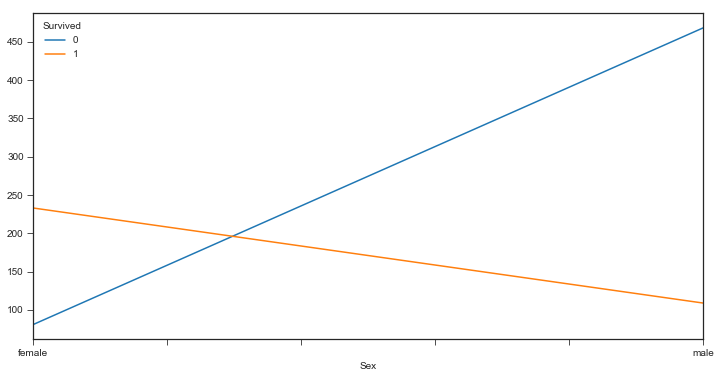

In [183]:
titanic_full_df[["Sex", "Survived"]].pivot_table(index=["Sex"], columns=["Survived"], aggfunc=len).plot()

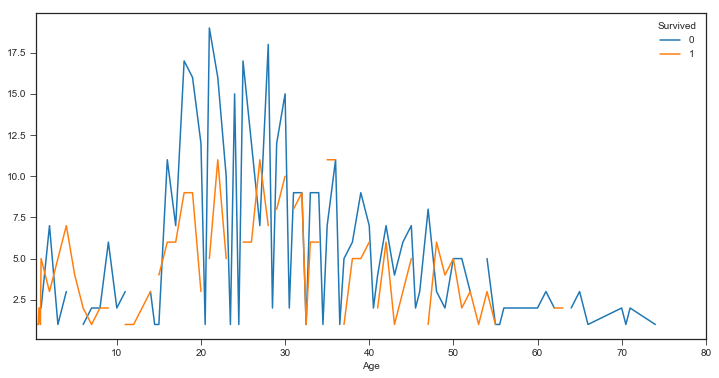

In [184]:
titanic_full_df[["Age", "Survived"]].pivot_table(index=["Age"], columns=["Survived"], aggfunc=len).plot()